In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson
random.seed(0)

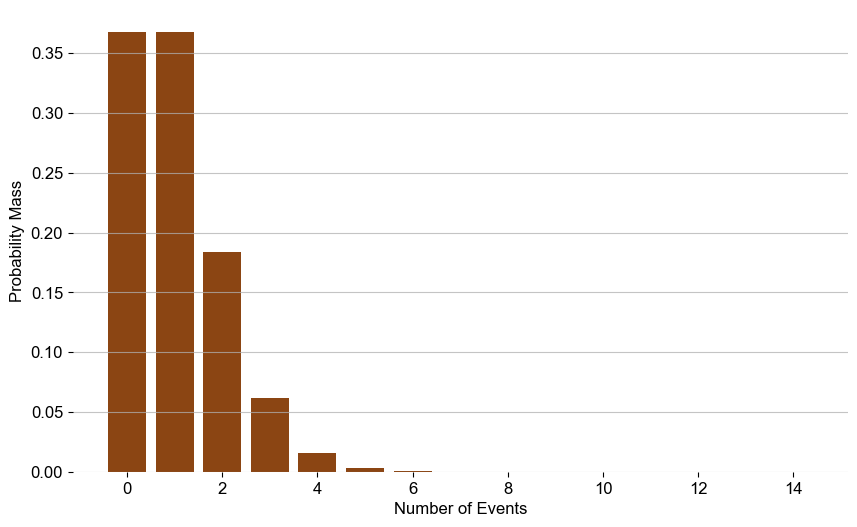

In [42]:
def plot_poisson_pdf(lam):
    """
    Plots the PDF of a Poisson distribution with parameter lambda.

    Parameters:
    lam (float): The rate parameter (lambda) of the Poisson distribution
    """
    # Generate the range of possible outcomes
    x = np.arange(0, 15)
    
    # Calculate the PDF for each outcome
    pmf = poisson.pmf(x, lam)
    
    # Set font type and size
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(x, pmf, color='#8B4513')  # Brown color without edgecolor
    plt.xlabel('Number of Events')
    plt.ylabel('Probability Mass')
    plt.grid(axis='y', alpha=0.75)
    
    # Remove outer black boundaries
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    plt.show()

# Example usage
plot_poisson_pdf(1)

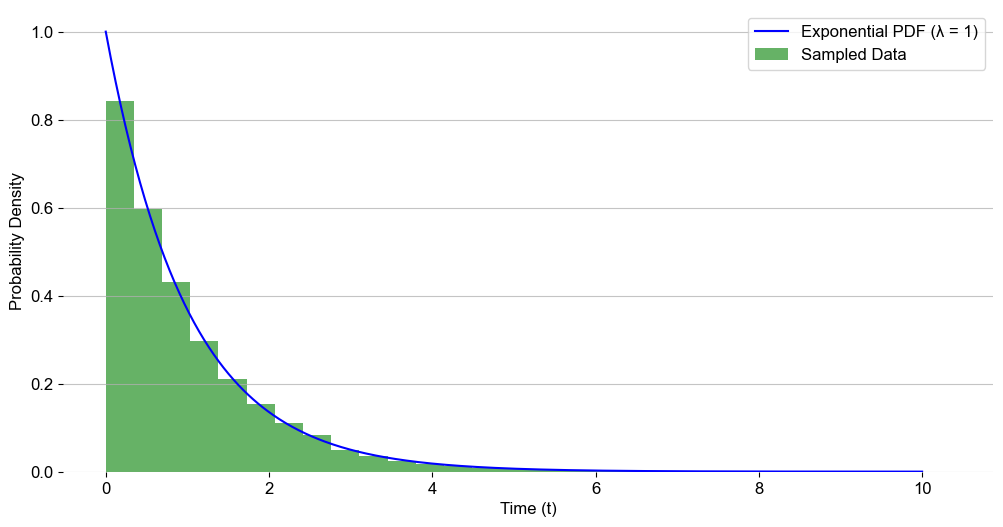

In [45]:
# Parameters
lambda_rate = 1  # Rate parameter (events per unit time)
sample_size = 10000  # Number of samples for histogram

# Generate values for plotting the PDF
t_values = np.linspace(0, 10, 500)  # Time range for the plot
pdf_values = lambda_rate * np.exp(-lambda_rate * t_values)  # Exponential PDF

# Generate random samples from the exponential distribution
samples = np.random.exponential(1 / lambda_rate, sample_size)

# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Plotting the PDF of the exponential distribution
plt.figure(figsize=(12, 6))
plt.plot(t_values, pdf_values, label=f"Exponential PDF (λ = {lambda_rate})", color="blue")
plt.hist(samples, bins=30, density=True, alpha=0.6, color="green", label="Sampled Data")
plt.xlabel("Time (t)")
plt.ylabel("Probability Density")
plt.legend()

# Remove outer black boundaries
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove vertical gridlines
plt.grid(axis='y', alpha=0.75)

plt.show()

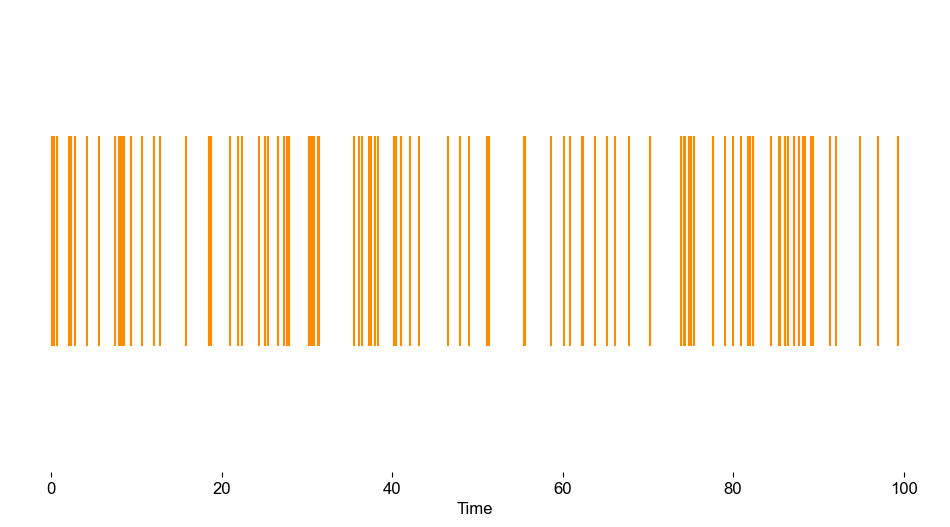

In [52]:
# Parameters for the Poisson process
lambda_rate = 1  # average rate of events per unit time
total_time = 100  # total time duration for the simulation

# Generate inter-arrival times as exponential random variables
inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=1000)
arrival_times = np.cumsum(inter_arrival_times)

# Filter arrival times within the total_time period
arrival_times = arrival_times[arrival_times <= total_time]


# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of arrival times
plt.eventplot(arrival_times, orientation='horizontal', lineoffsets=1, linelengths=0.5, color='darkorange')

# Marking the clusters visually with shaded areas
cluster_threshold = 1  # threshold to consider points as clustered if they are close
clusters = []
current_cluster = [arrival_times[0]]

# Find clusters based on inter-arrival times
for i in range(1, len(arrival_times)):
    if arrival_times[i] - arrival_times[i - 1] < cluster_threshold:
        current_cluster.append(arrival_times[i])
    else:
        if len(current_cluster) > 1:
            clusters.append(current_cluster)
        current_cluster = [arrival_times[i]]
if len(current_cluster) > 1:
    clusters.append(current_cluster)


# Plot settings
plt.xlabel('Time')
plt.yticks([])

# Remove outer black boundaries
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove vertical gridlines
plt.grid(axis='y', alpha=0.75)

plt.show()

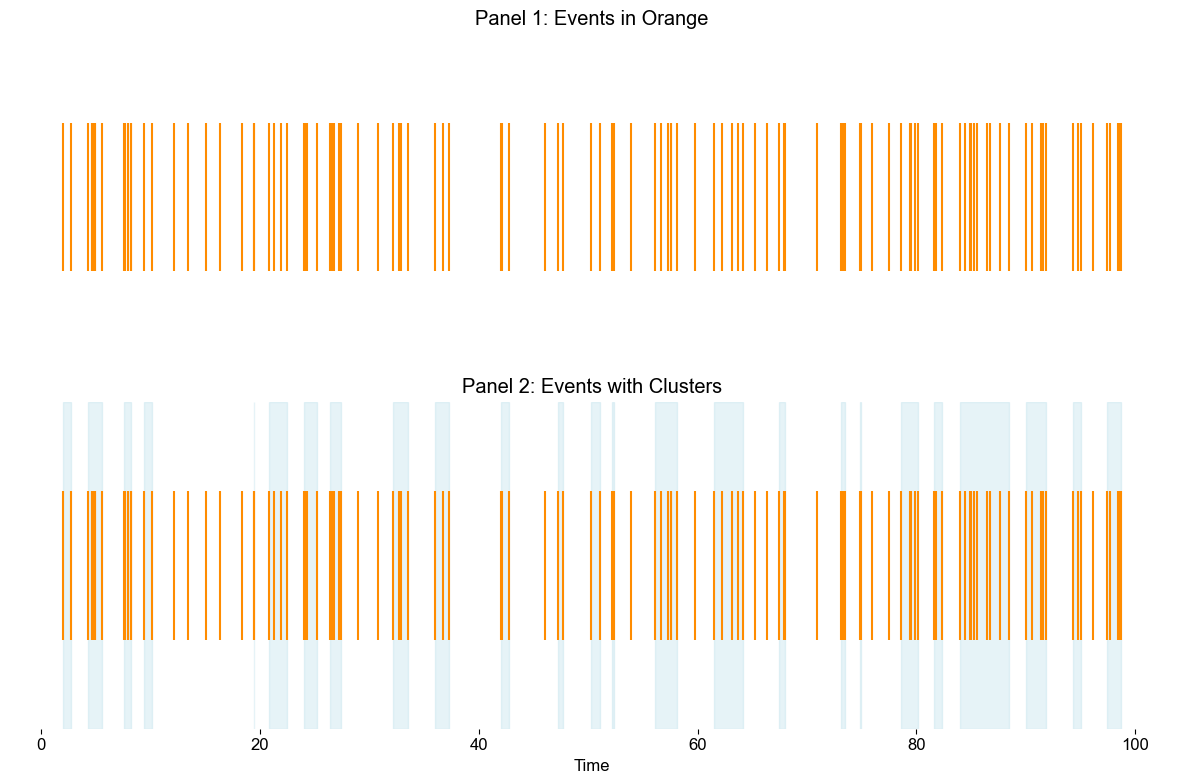

In [51]:
# Parameters for the Poisson process
lambda_rate = 1  # average rate of events per unit time
total_time = 100  # total time duration for the simulation

# Generate inter-arrival times as exponential random variables
inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=1000)
arrival_times = np.cumsum(inter_arrival_times)

# Filter arrival times within the total_time period
arrival_times = arrival_times[arrival_times <= total_time]

# Set font type and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Panel 1: Scatter plot of arrival times
ax1.eventplot(arrival_times, orientation='horizontal', lineoffsets=1, linelengths=0.5, color='darkorange')
ax1.set_yticks([])
ax1.set_title('Panel 1: Events in Orange')

# Remove x-axis and outer black boundaries for panel 1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.set_visible(False)

# Panel 2: Scatter plot of arrival times with clusters
ax2.eventplot(arrival_times, orientation='horizontal', lineoffsets=1, linelengths=0.5, color='darkorange')

# Marking the clusters visually with shaded areas
cluster_threshold = 1  # threshold to consider points as clustered if they are close
clusters = []
current_cluster = [arrival_times[0]]

# Find clusters based on inter-arrival times
for i in range(1, len(arrival_times)):
    if arrival_times[i] - arrival_times[i - 1] < cluster_threshold:
        current_cluster.append(arrival_times[i])
    else:
        if len(current_cluster) > 1:
            clusters.append(current_cluster)
        current_cluster = [arrival_times[i]]
if len(current_cluster) > 1:
    clusters.append(current_cluster)

# Shade clusters
for cluster in clusters:
    ax2.axvspan(cluster[0], cluster[-1], color='lightblue', alpha=0.3)

ax2.set_xlabel('Time')
ax2.set_yticks([])
ax2.set_title('Panel 2: Events with Clusters')

# Remove outer black boundaries for panel 2
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Remove vertical gridlines
ax1.grid(axis='y', alpha=0.75)
ax2.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()